In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.preprocessing import OneHotEncoder

In [4]:
train = pd.read_csv('train.csv', index_col='id') 
test = pd.read_csv('test.csv', index_col='id') 

In [5]:
trainY = train['f291']

In [6]:
trainX = train.drop('f291', axis=1)

In [7]:
from sklearn.impute import KNNImputer

In [8]:
df_obj = trainX.select_dtypes(exclude=[np.number])

In [9]:
def yes_no(row):
    if row == 'no':
        return 0
    elif row == 'yes':
        return 1

In [10]:
cols = ['f29', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f106', 'f114', 'f118']
for item in cols:
    trainX[item] = trainX[item].apply(yes_no)
    test[item] = test[item].apply(yes_no)

In [11]:
def get_f11(row):
    if row == 'Investment':
        return 0
    elif row == 'OwnerOccupier':
        return 1

In [12]:
def get_f152(row):
    if row == 'excellent':
        return 0
    elif row == 'good':
        return 1
    elif row == 'no data':
        return 2
    elif row == 'poor':
        return 3
    elif row == 'satisfactory':
        return 4

In [13]:
trainX['f11'] = trainX['f11'].apply(get_f11)
test['f11'] = test['f11'].apply(get_f11)

trainX['f152'] = trainX['f152'].apply(get_f152)
test['f152'] = test['f152'].apply(get_f152)

In [14]:
trainX.drop(['f1', 'f12'], axis=1, inplace=True)
test.drop(['f1', 'f12'], axis=1, inplace=True)

In [15]:
imp_mean = KNNImputer()
imp_mean.fit(trainX)
train_ = imp_mean.transform(trainX)
test_ = imp_mean.transform(test)

In [16]:
scaler = StandardScaler()
scaler.fit(train_)
train_sc = scaler.transform(train_)
test_sc = scaler.transform(test_)

In [17]:
trn = pd.DataFrame(train_sc)
tst = pd.DataFrame(test_sc)

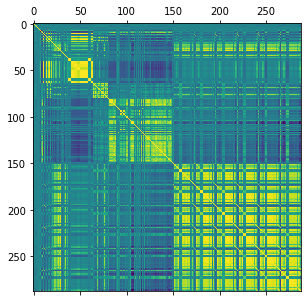

In [18]:
plt.matshow(trn.corr())
plt.show()

In [19]:
# Create correlation matrix
corr_matrix = trn.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features 
print(to_drop)

[14, 16, 17, 18, 19, 29, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 70, 71, 73, 74, 75, 77, 80, 83, 84, 85, 86, 87, 88, 95, 97, 98, 100, 101, 105, 106, 107, 108, 114, 116, 120, 121, 122, 123, 124, 125, 129, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 145, 146, 147, 152, 156, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 175, 176, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 193, 196, 197, 198, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 216, 217, 219, 220, 221, 222, 223, 224, 225, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 262, 263, 265, 267, 268, 269, 270, 271, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 285, 286]


<ipython-input-19-04afd9df49f8>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [20]:
trn.drop(to_drop, axis=1, inplace=True)
tst.drop(to_drop, axis=1, inplace=True)

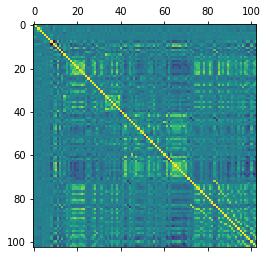

In [21]:
plt.matshow(trn.corr())
plt.show()

In [22]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations=1000,
                           task_type="GPU",
                           devices='0:1')

In [23]:
model.fit(trn.values, trainY, verbose=False)

In [24]:
preds = model.predict(tst.values)

In [25]:
submit = pd.read_csv('sample_submission.csv')

In [26]:
submit['prediction'] = preds
submit.to_csv('Mirpulatov_islombek.csv', index=False)